Nama  : Rizki Ramadhan

NIM   : 1103213091

Classification Model

# Import Libary

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

Membaca File CSV

Prompt : buat kode untuk membaca file CSV ke dalam DataFrame  dengan delimiter ';'

In [20]:
# Ganti 'nama_file.csv' dengan nama file CSV yang ingin dibaca
file_path = 'bank-full.csv'

# Membaca file CSV dengan delimiter ';'
df = pd.read_csv(file_path, delimiter=';')

# Menampilkan 5 baris pertama dari DataFrame
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


Insight : menampilkan 5 baris pertama dari dataframe band dataset bank-full.csv, Beberapa fitur, seperti education dan previous, memiliki nilai "unknown," yang mengindikasikan adanya data yang hilang atau tidak diketahui, memerlukan langkah imputasi atau penanganan khusus. Fitur seperti balance menunjukkan variasi yang besar, dari saldo yang sangat rendah hingga tinggi, yang dapat menjadi faktor penting dalam prediksi

# Explanatory Data Analysis (EDA)
# Memahami karakteristik dataset dengan melihat informasi dasar dan statistik deskriptif

Prompt : Buatkan code untuk melakukan Explanatory Data Analysis seperti informasi dasar dataset, Statistik Deskriptif dan juga missing valuesnya

In [21]:
# Informasi dasar tentang dataset
print("\nInformasi Dataset:")
print(df.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


Insight : Dataset ini memiliki 45.211 entri dengan 17 kolom, yang mencakup data demografi, keuangan, dan informasi kampanye pemasaran. Tidak ada nilai null di seluruh kolom, yang berarti data ini lengkap dan siap untuk dianalisis. Kolom-kolom seperti age, balance, duration, dan campaign bertipe numerik, sedangkan sebagian besar lainnya bertipe kategorikal (job, marital, education, dll.), sehingga preprocessing seperti encoding variabel kategorikal diperlukan sebelum modeling. Target variabel y bertipe kategorikal ("yes" atau "no"), memungkinkan analisis klasifikasi

In [22]:
# Statistik deskriptif dari dataset
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75% 

Insight : Dari statistik deskriptif, terlihat bahwa kolom age memiliki rentang nilai dari 18 hingga 95 tahun, dengan rata-rata 40,9 tahun, mencerminkan beragamnya kelompok usia dalam dataset ini. Kolom balance menunjukkan variasi besar, dengan nilai minimum -8019 dan maksimum 102127,

In [23]:
# Mengecek missing values pada dataset
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Insight : Dataset ini tidak memiliki nilai yang hilang pada seluruh kolom, sehingga data siap untuk analisis lebih lanjut tanpa perlu melakukan imputasi. Hal ini memberikan keuntungan karena tidak ada risiko bias yang muncul akibat pengisian data kosong.

# Menampilkan beberapa visualisasi dasar


Prompt :  Membuat visualisasi dasar untuk memahami distribusi data fitur tipe numerik dan tipe kategorikal dengan informasi dataset seperti ini

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

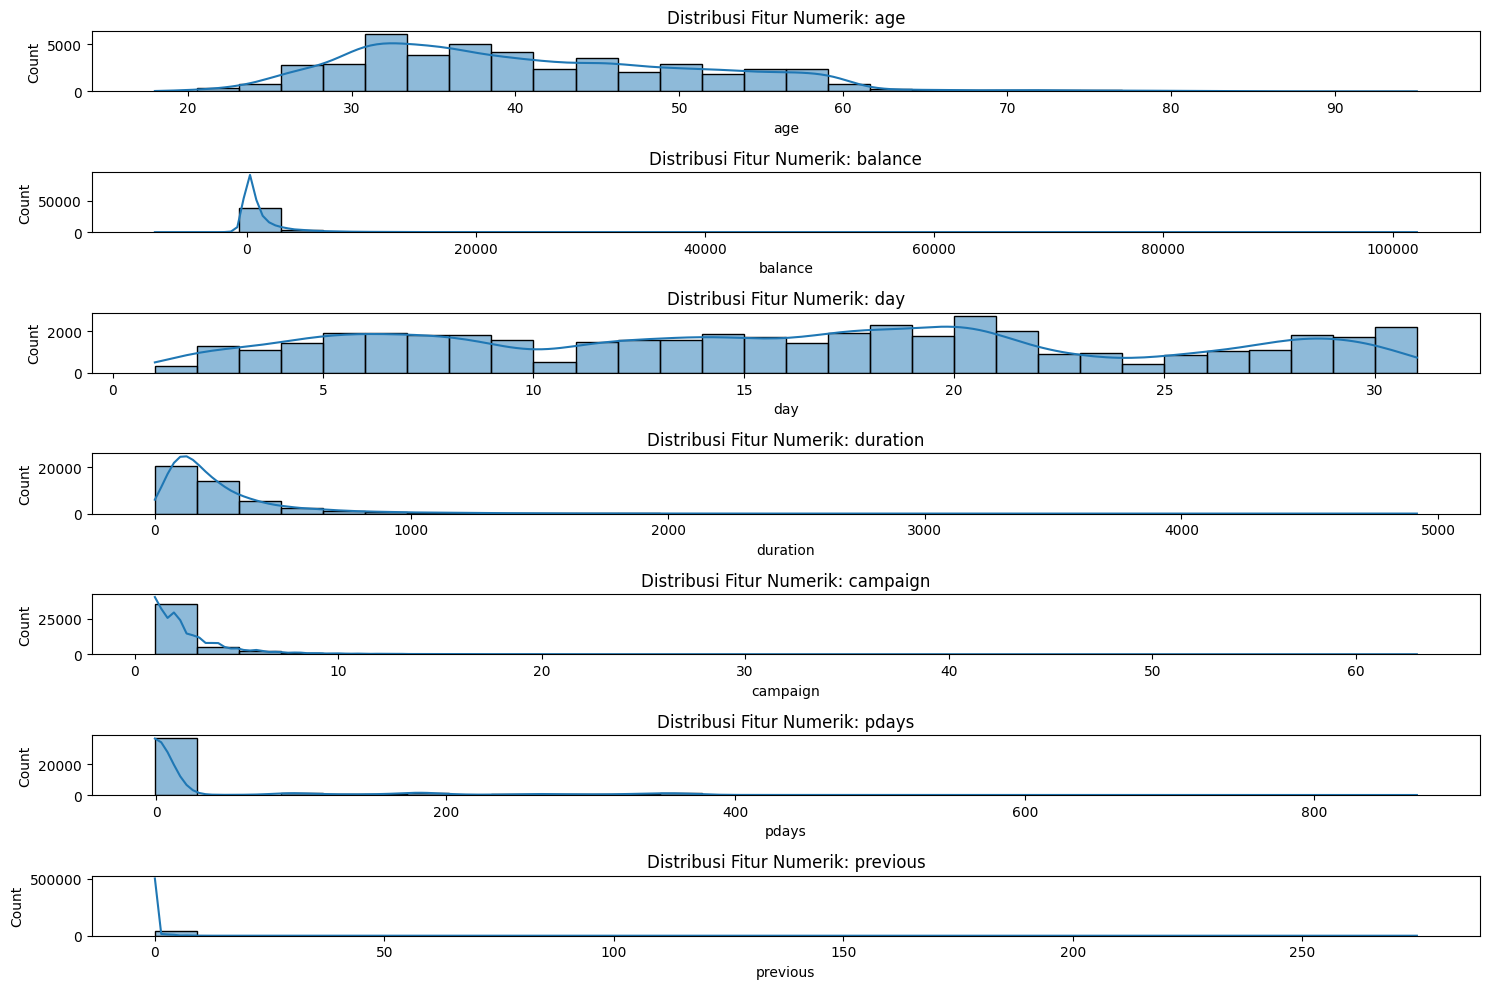

In [24]:
# Visualisasi dasar untuk memahami distribusi data
# Visualisasi fitur numerik
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 1, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi Fitur Numerik: {col}')
plt.tight_layout()
plt.show()

Insight : Distribusi fitur numerik dalam dataset menunjukkan pola yang beragam. Sebagian besar data usia terkonsentrasi pada rentang 30-50 tahun, sedangkan saldo (balance) memiliki distribusi yang sangat tidak merata dengan mayoritas di sekitar nol dan beberapa outlier ekstrem hingga mendekati 100.000. Fitur duration, yang mencatat durasi panggilan, menunjukkan distribusi yang sangat miring ke kanan, di mana panggilan pendek mendominasi. Ini relevan karena durasi panggilan diketahui menjadi salah satu indikator kuat apakah nasabah setuju atau tidak, dengan panggilan yang lebih lama sering kali menunjukkan ketertarikan.

Fitur pdays dan previous mencerminkan riwayat interaksi dengan nasabah. Sebagian besar nilai pdays bernilai -1, menunjukkan bahwa nasabah tidak dihubungi dalam kampanye sebelumnya, sementara beberapa yang dihubungi sebelumnya cenderung memiliki lebih banyak interaksi (previous)

Prompt :  Membuat visualisasi dasar untuk memahami distribusi data fitur kategorikal

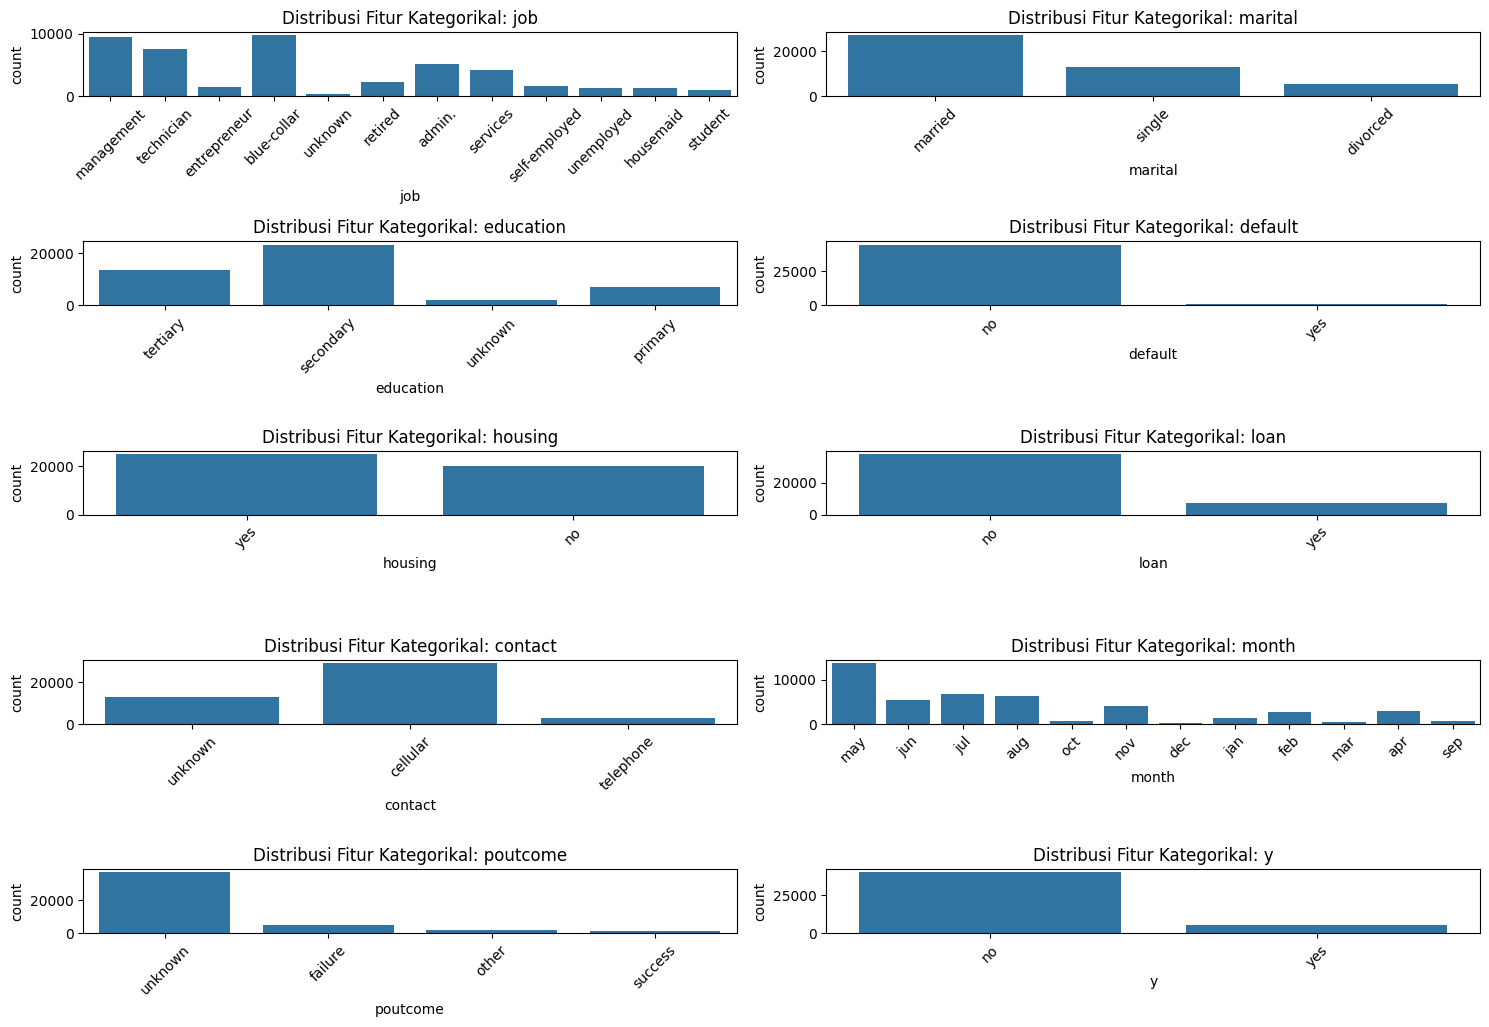

In [25]:
# Visualisasi fitur kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_features):
    plt.subplot(len(categorical_features), 2, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribusi Fitur Kategorikal: {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight : Distribusi fitur kategorikal menunjukkan beberapa pola menarik. Fitur pekerjaan (job) didominasi oleh kategori seperti blue-collar, management, dan technician, sementara kategori seperti student dan housemaid jauh lebih sedikit. Sebagian besar pelanggan berstatus menikah (marital) dan memiliki tingkat pendidikan secondary (education). Mayoritas tidak memiliki pinjaman kredit (loan) dan pinjaman rumah (housing), serta tidak memiliki default pada catatan keuangan (default). Sebagian besar kontak dilakukan melalui seluler (contact), dan mayoritas terjadi pada bulan Mei. Target y menunjukkan bahwa sebagian besar pelanggan tidak menyetujui penawaran kampanye/campaign.

Prompt : Buatkan code untuk membuat heatmap untuk melihat korelasi antar fitur numerik

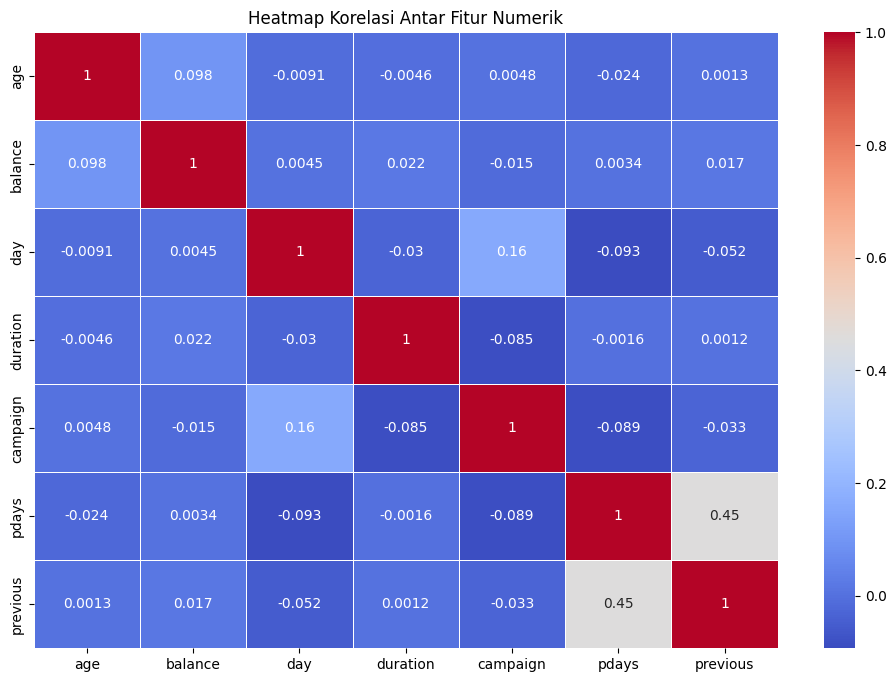

In [26]:
# Visualisasi heatmap untuk melihat korelasi antar fitur numerik
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

Insight : Heatmap korelasi antar fitur numerik menunjukkan bahwa sebagian besar variabel memiliki korelasi yang rendah satu sama lain, dengan nilai korelasi mendekati nol. Fitur previous dan pdays memiliki korelasi tertinggi di antara pasangan variabel, yaitu sekitar 0.45, yang menunjukkan hubungan moderat, kemungkinan karena keduanya mencerminkan riwayat kontak pelanggan sebelumnya. Variabel lain seperti balance, duration, dan campaign memiliki korelasi yang sangat rendah dengan fitur lain, menandakan bahwa mereka cenderung independen dan dapat memberikan informasi unik.

# Pipeline

Prompt: Buat code untuk membagi dataset menjadi data pelatihan dan pengujian untuk evaluasi model , kemudian mengubah nilai target menjadi numerik menggunakan LabelEncoder


In [27]:

# Mengisi missing values dengan nilai rata-rata untuk fitur numerik dan modus untuk fitur kategorikal
df[numerical_features] = df[numerical_features].apply(lambda x: x.fillna(x.mean()))
df[categorical_features] = df[categorical_features].apply(lambda x: x.fillna(x.mode()[0]))

# Membagi dataset menjadi data pelatihan dan pengujian
X = df.drop('y', axis=1)  # Menghapus kolom target
y = df['y']  # Kolom target

# Mengubah nilai target menjadi numerik menggunakan LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Membagi data menjadi data pelatihan dan pengujian (80% data pelatihan, 20% data pengujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData pelatihan dan pengujian telah dibagi:")
print(f"Jumlah data pelatihan: {len(X_train)}")
print(f"Jumlah data pengujian: {len(X_test)}")



Data pelatihan dan pengujian telah dibagi:
Jumlah data pelatihan: 36168
Jumlah data pengujian: 9043


Insight : Dataset telah dibagi menjadi 36.168 data pelatihan dan 9.043 data pengujian, yang sesuai dengan rasio umum 80:20. Pembagian ini memastikan model memiliki cukup data untuk belajar pada fase pelatihan dan menyediakan dataset pengujian yang memadai untuk mengevaluasi performa. 

Prompt : Buat code  Preprocessing untuk fitur kategorikal dan numerik


In [ ]:
# Preprocessing fitur kategorikal dan numerik
numerical_features = list(X.select_dtypes(include=['int64', 'float64']).columns)
categorical_features = list(X.select_dtypes(include=['object']).columns)

# Pipeline untuk preprocessing fitur numerik dan kategorikal
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


Prompt : Buatkan code pipeline untuk berbagai model klasifikasi (Logistic Regression, Decision Tree, k-NN, XGBoost)

In [29]:
# Membuat pipeline untuk berbagai model klasifikasi
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'k-NN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    # Melatih model
    pipeline.fit(X_train, y_train)
    # Memprediksi data uji
    y_pred = pipeline.predict(X_test)
    # Evaluasi model
    print(f"\nModel: {model_name}")
    print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))

print("\nPreprocessing dan evaluasi model telah selesai dilakukan untuk berbagai model klasifikasi.")


Model: Logistic Regression
Akurasi: 0.8988167643481145
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043


Model: Decision Tree
Akurasi: 0.8727192303439124
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.47      0.49      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.71      0.70      9043
weighted avg       0.87      0.87      0.87      9043


Model: k-NN
Akurasi: 0.8988167643481145
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.63      0.38      0.48      1091

    accuracy                       

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:55:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Akurasi: 0.9064469755612076
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7952
           1       0.64      0.50      0.57      1091

    accuracy                           0.91      9043
   macro avg       0.79      0.73      0.76      9043
weighted avg       0.90      0.91      0.90      9043


Preprocessing dan evaluasi model telah selesai dilakukan untuk berbagai model klasifikasi.


Insight : Berdasarkan hasil evaluasi model terhadap target y, model Logistic Regression dan k-NN memberikan akurasi tertinggi sebesar 89.88%, sementara model Decision Tree memiliki akurasi lebih rendah sebesar 87.27%. Namun, perbedaan signifikan terlihat pada nilai recall dan F1-score untuk kelas minoritas (1), di mana Logistic Regression hanya memiliki recall 34% dan F1-score 44%, menunjukkan bahwa model kesulitan mendeteksi pelanggan yang menyetujui produk. Kinerja k-NN sedikit lebih baik dengan recall 38% dan F1-score 48% untuk kelas 1, namun masih rendah dibandingkan kelas mayoritas (0).

Model XGBoost memberikan performa terbaik dengan akurasi sebesar 90.64%. Selain itu, model ini menunjukkan peningkatan pada recall (50%) dan F1-score (57%) untuk kelas minoritas (1), yang lebih tinggi dibandingkan Logistic Regression, Decision Tree, maupun k-NN. Kelas mayoritas (0) tetap memiliki metrik yang sangat baik, dengan precision, recall, dan F1-score di atas 93%. Macro average menunjukkan bahwa model mampu menangani kedua kelas dengan lebih seimbang dibandingkan model lain.

Hasil ini menunjukkan bahwa XGBoost adalah pilihan optimal untuk dataset ini

# Hypertuning Model

Hyperparameter Tuning untuk berbagai model klasifikasi


Prompt : Buatkan code untuk melakukan Hyperparameter Tuning dengan menggunakan GridSearchCV pada setiap model dan juga buatkan reportnya, buatkan code setelah bagian pipeline

In [31]:
# Hyperparameter Tuning dengan GridSearchCV
param_grids = {
    'Logistic Regression': {'classifier__C': [0.1, 1, 10]},
    'Decision Tree': {'classifier__max_depth': [3, 5, 10], 'classifier__min_samples_split': [2, 5, 10]},
    'k-NN': {'classifier__n_neighbors': [3, 5, 7]},
    'XGBoost': {'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [3, 5, 7]}
}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    # Evaluasi model terbaik
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"\nModel: {model_name} (Setelah Hyperparameter Tuning)")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))

print("\nPreprocessing, evaluasi model, dan Hyperparameter Tuning telah selesai dilakukan untuk berbagai model klasifikasi.")



Model: Logistic Regression (Setelah Hyperparameter Tuning)
Best Parameters: {'classifier__C': 1}
Akurasi: 0.8988167643481145
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043


Model: Decision Tree (Setelah Hyperparameter Tuning)
Best Parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 10}
Akurasi: 0.8972686055512551
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.64      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(



Model: k-NN (Setelah Hyperparameter Tuning)
Best Parameters: {'classifier__n_neighbors': 3}
Akurasi: 0.8906336392790003
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.57      0.39      0.46      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.67      0.70      9043
weighted avg       0.88      0.89      0.88      9043


Model: XGBoost (Setelah Hyperparameter Tuning)
Best Parameters: {'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Akurasi: 0.9060046444763906
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7952
           1       0.66      0.46      0.54      1091

    accuracy                           0.91      9043
   macro avg       0.79      0.71      0.74      9043
weighted avg       0.90      0.91      0.90      9043


Preprocessing, evaluasi model, dan Hyperparameter Tuning telah selesa

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:59:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Insight : Setelah dilakukan hyperparameter tuning, Logistic Regression dengan parameter terbaik {C: 1} dan Decision Tree dengan parameter terbaik {max_depth: 5, min_samples_split: 10} menunjukkan hasil yang hampir serupa dalam hal akurasi (Logistic Regression: 89.88%, Decision Tree: 89.72%). Namun, Logistic Regression memiliki F1-score yang sedikit lebih baik untuk kelas 1 (45%) dibandingkan Decision Tree (44%). Kedua model masih memiliki kesulitan dalam mendeteksi kelas 1, terlihat dari rendahnya nilai recall (34% untuk Logistic Regression dan 33% untuk Decision Tree). Hyperparameter tuning memberikan peningkatan stabilitas pada kedua model, terutama pada pengendalian overfitting untuk Decision Tree dengan pembatasan kedalaman pohon dan minimal jumlah sampel.

Setelah dilakukan hyperparameter tuning, model k-NN dengan parameter terbaik {n_neighbors: 3} memiliki akurasi sebesar 89.06%, tetapi performa pada kelas minoritas (1) masih rendah dengan recall hanya 39% dan F1-score 46%. Sebaliknya, model XGBoost dengan parameter terbaik {max_depth: 3, n_estimators: 100} memberikan performa terbaik secara keseluruhan, dengan akurasi sebesar 90.60%. XGBoost juga menunjukkan peningkatan pada kelas minoritas, dengan recall 46% dan F1-score 54%, yang lebih baik dibandingkan model lainnya. Hal ini menjadikan XGBoost sebagai pilihan optimal untuk dataset ini, terutama jika diperlukan prediksi yang lebih baik untuk kelas minoritas dalam kampanye pemasaran bank. 

# Kesimpulan
Dari evaluasi semua model, terlihat bahwa XGBoost adalah model dengan performa terbaik, baik sebelum maupun setelah hyperparameter tuning. Setelah tuning, XGBoost mencapai akurasi tertinggi sebesar 90.60%, dengan peningkatan F1-score untuk kelas minoritas (1) sebesar 54% dan recall sebesar 46%, menjadikannya model yang lebih andal dalam menangani ketidakseimbangan kelas. Model lainnya, seperti Logistic Regression, Decision Tree, dan k-NN, juga menunjukkan akurasi yang kompetitif, berkisar antara 89%-90%, namun kesulitan dalam mendeteksi kelas 1. Setelah tuning, Logistic Regression dan Decision Tree masing-masing memiliki F1-score sebesar 45% dan 44%, sedangkan k-NN mencapai 46%. Namun, XGBoost tetap unggul dalam keseimbangan antara kelas mayoritas dan minoritas.  XGBoost tetap menjadi model yang paling direkomendasikan.